### Red Blood Cells Images

Preparing Tensorflow and tensorflow libraries

In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-13 13:58:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-13 13:58:06 (46.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, \
  Conv2D, BatchNormalization, ZeroPadding2D, MaxPooling2D, Activation, add
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [3]:
## Setting up Global Variables
IMG_SIZE = 224
BATCH_SIZE = 128
EPOCHS = 16

In [4]:
import itertools

### Preparing the Data

Preparing the data to feed it to the neural Network

In [5]:
from helper_functions import *

In [6]:
unzip_data("/content/drive/MyDrive/Red Blood Cells/archive (1).zip")

In [7]:
## Setting up the directories 
train_dir = "/content/dataset2-master/dataset2-master/images/TRAIN/"
test_dir = "/content/dataset2-master/dataset2-master/images/TEST/"

Viewing a random Image to check

Creating a function to take a random image and view it 

In [8]:
## Viewing a random image from the dataset 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img, cmap = "gray")
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (240, 320, 3)


array([[[222, 222, 220],
        [217, 217, 215],
        [213, 215, 214],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[224, 224, 222],
        [219, 219, 217],
        [215, 217, 214],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[226, 227, 222],
        [221, 221, 219],
        [218, 220, 217],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  3,   0,   0],
        [  3,   0,   0],
        [  3,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  4,   0,   0],
        [  4,   0,   0],
        [  4,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  6,   0,   0],
        [  6,   0,   0],
        [  6,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

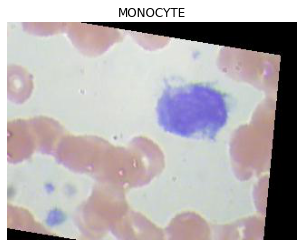

In [9]:
view_random_image(train_dir, "MONOCYTE")

In [10]:
## Creating the data generators 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

## Setting up the directories
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (IMG_SIZE, IMG_SIZE),
                                               class_mode = "categorical",
                                               color_mode = 'rgb',
                                               batch_size = BATCH_SIZE)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = "categorical",
                                             color_mode = 'rgb',
                                             batch_size = BATCH_SIZE)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [11]:
for data, label in enumerate(train_data):
  print(data, label)
  break

0 (array([[[[0.7411765 , 0.63529414, 0.5686275 ],
         [0.7607844 , 0.6509804 , 0.6039216 ],
         [0.7568628 , 0.6431373 , 0.6117647 ],
         ...,
         [0.882353  , 0.82745105, 0.82745105],
         [0.03137255, 0.        , 0.        ],
         [0.04313726, 0.        , 0.02352941]],

        [[0.7372549 , 0.6313726 , 0.5647059 ],
         [0.7568628 , 0.64705884, 0.6       ],
         [0.75294125, 0.6392157 , 0.60784316],
         ...,
         [0.8078432 , 0.75294125, 0.7490196 ],
         [0.8470589 , 0.8000001 , 0.8078432 ],
         [0.02745098, 0.        , 0.        ]],

        [[0.73333335, 0.627451  , 0.5529412 ],
         [0.7490196 , 0.6392157 , 0.58431375],
         [0.7490196 , 0.6392157 , 0.59607846],
         ...,
         [0.7843138 , 0.7294118 , 0.7176471 ],
         [0.8196079 , 0.77647066, 0.7686275 ],
         [0.05882353, 0.01960784, 0.02352941]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.      

### Setting up the ResNet Model layers

Creating the identity block

In [12]:
def identity_block(input_, kernel_size, filters):
    f1, f2, f3 = filters

    x = Conv2D(f1, (1, 1), 
               kernel_initializer='he_normal'
    )(input_)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size, padding='same',
               kernel_initializer='he_normal'
    )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f3, (1, 1), 
               kernel_initializer='he_normal'
    )(x)
    x = BatchNormalization()(x)

    x = add([x, input_])
    x = Activation('relu')(x)
    return x

Creating the convolutional block

In [13]:
def conv_block(input_,
               kernel_size,
               filters,
               strides=(2, 2)):
    f1, f2, f3 = filters

    x = Conv2D(f1, (1, 1), strides=strides,
               kernel_initializer='he_normal'
    )(input_)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size, padding='same',
               kernel_initializer='he_normal'
    )(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f3, (1, 1),
               kernel_initializer='he_normal'
    )(x)
    x = BatchNormalization()(x)

    shortcut = Conv2D(f3, (1, 1), strides=strides,
                      kernel_initializer='he_normal'
    )(input_)
    shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [14]:
# our custom resnet
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = ZeroPadding2D(padding=(3, 3))(inputs)
x = Conv2D(64, (7, 7),
           strides=(2, 2),
           padding='valid',
           kernel_initializer='he_normal'
           )(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1, 1))(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

x = conv_block(x, 3, [64, 64, 256], strides=(1, 1))
x = identity_block(x, 3, [64, 64, 256])
x = identity_block(x, 3, [64, 64, 256])

x = conv_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])
x = identity_block(x, 3, [128, 128, 512])

## Feed it to the dense model 
x = Flatten()(x)
outputs = Dense(4, activation = "softmax")(x)

### Building the model

In [15]:
resnet_model = Model(inputs, outputs)

## Setting up Callbacks

In [16]:
## Setting up callbacks
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.25, # multiply the learning rate by 0.2 (reduce by 4x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

## Compiling the model

In [17]:
resnet_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])

## Fitting the model

In [18]:
history_0 = resnet_model.fit(train_data,
                        epochs = 100,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [early_stopping, reduce_lr])

Epoch 1/100
78/78 [==============================] - 144s 2s/step - loss: 37.1349 - accuracy: 0.3169 - val_loss: 16.0419 - val_accuracy: 0.2521 - lr: 0.0010
Epoch 2/100
78/78 [==============================] - 122s 2s/step - loss: 2.7016 - accuracy: 0.5376 - val_loss: 6.8558 - val_accuracy: 0.2529 - lr: 0.0010
Epoch 3/100
78/78 [==============================] - 122s 2s/step - loss: 1.4494 - accuracy: 0.7686 - val_loss: 3.3793 - val_accuracy: 0.3076 - lr: 0.0010
Epoch 4/100
78/78 [==============================] - 122s 2s/step - loss: 0.7195 - accuracy: 0.8915 - val_loss: 3.5531 - val_accuracy: 0.5794 - lr: 0.0010
Epoch 5/100
78/78 [==============================] - ETA: 0s - loss: 0.3695 - accuracy: 0.9170
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
78/78 [==============================] - 122s 2s/step - loss: 0.3695 - accuracy: 0.9170 - val_loss: 8.0384 - val_accuracy: 0.3989 - lr: 0.0010
Epoch 6/100
78/78 [==============================] - 122s 2s

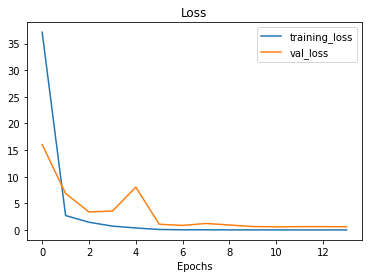

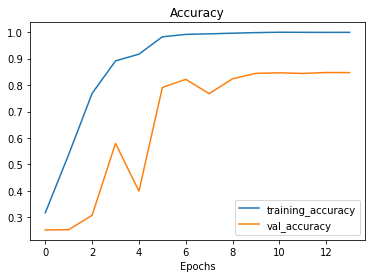

In [19]:
plot_loss_curves(history_0)

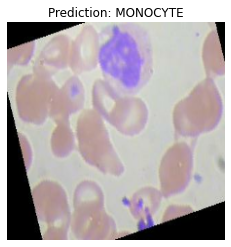

In [20]:
pred_and_plot(model = resnet_model,
              filename = "/content/dataset2-master/dataset2-master/images/TEST/MONOCYTE/_0_1283.jpeg",
              class_names = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"])